In [101]:
# Lagrange interpolation

from sympy import symbols

x = symbols('x')

def f(x):
#     return 1/(1+25*x**2)
    return x**3 + x**2

In [102]:
from numpy import linspace
x_list = list(linspace(-3,3,20))
f_list = list(map(f,x_list))
print(x_list)
print(f_list)
N = len(x_list)

[-3.0, -2.6842105263157894, -2.3684210526315788, -2.0526315789473686, -1.736842105263158, -1.4210526315789473, -1.105263157894737, -0.7894736842105265, -0.47368421052631593, -0.1578947368421053, 0.1578947368421053, 0.4736842105263155, 0.7894736842105261, 1.1052631578947363, 1.421052631578947, 1.7368421052631575, 2.052631578947368, 2.3684210526315788, 2.6842105263157894, 3.0]
[-18.0, -12.134713515089663, -7.676046070855807, -4.435048840938914, -2.222772998979443, -0.850269718617874, -0.1285901734946786, 0.1312144627496719, 0.11809301647470481, 0.020994314039947524, 0.028867181804927852, 0.3306604461291729, 1.115322933372211, 2.5718034698935672, 4.889050882052773, 8.256013996209354, 12.86164163872284, 18.894882635952758, 26.544685814258635, 36.0]


In [103]:
# Lagrange term
def l_term(x_list, i):
    N = len(x_list)
    L = 1
    for j in range(N):
        if i  != j:
            L *= x-x_list[j]
    return L

In [104]:
l_term(x_list,1)

(x - 3.0)*(x - 2.68421052631579)*(x - 2.36842105263158)*(x - 2.05263157894737)*(x - 1.73684210526316)*(x - 1.42105263157895)*(x - 1.10526315789474)*(x - 0.789473684210526)*(x - 0.473684210526315)*(x - 0.157894736842105)*(x + 0.157894736842105)*(x + 0.473684210526316)*(x + 0.789473684210527)*(x + 1.10526315789474)*(x + 1.42105263157895)*(x + 1.73684210526316)*(x + 2.05263157894737)*(x + 2.36842105263158)*(x + 3.0)

In [105]:
# Lagrange interpolation
def l_poly(x_list, f_list):
    poly = 0
    
    for i in range(len(f_list)):
        lt = l_term(x_list,i)
        poly += f_list[i]*lt/lt.subs(x,x_list[i])
    return poly

In [106]:
p_n = l_poly(x_list,f_list)

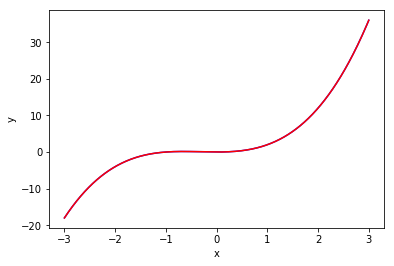

In [107]:
import matplotlib.pyplot as plt
import numpy as np
t = np.arange(-3, 3.01, 0.01)
ps = [float(p_n.subs(x,tt)) for tt in t]
plt.plot(t,f(t), 'b')
plt.plot(t, ps, 'r')
plt.xlabel('x')
# plt.ylim([0,1.5])
plt.ylabel('y')
plt.show()

In [97]:
# differential quotient
div_diff = [[0 for i in range(N+1)] for j in range(N+1)]
for i in range(N):
    div_diff[i][i] = f_list[i]
for m in range(1,N):
    for j in range(N-m):
        div_diff[j][j+m] = div_diff[j+1][j+m] - div_diff[j][j+m-1]
        div_diff[j][j+m] /= x_list[j+m] - x_list[j]
for i in range(1,N+1):
    print(div_diff[0][i])

0.003471555844408252
0.0023216043264117987
0.0015969681948639345
0.0012203231065931585
0.0010958017098493171
0.0012270211617389749
0.001853065725751286
0.004212524429534775
0.012435957463213384
-0.0648771893797805
0.10794864348669245
-0.10776777507446955
0.07628600441823555
-0.041252379785251404
0.017661554194340935
-0.0060366390320576785
0.001597818435946621
-0.00028109768780542265
-8.944667923005412e-19
0


In [98]:
def newton(xs, ys):
    p = 0
    for i in range(N):
        term = 1
        for j in range(i+1):
            term *= (x-xs[j])
        p += term*div_diff[0][i+1]
    return p

In [99]:
pn = newton(x_list, f_list)
# pn

0.00347155584440825*x - 8.94466792300541e-19*(x - 2.68421052631579)*(x - 2.36842105263158)*(x - 2.05263157894737)*(x - 1.73684210526316)*(x - 1.42105263157895)*(x - 1.10526315789474)*(x - 0.789473684210526)*(x - 0.473684210526315)*(x - 0.157894736842105)*(x + 0.157894736842105)*(x + 0.473684210526316)*(x + 0.789473684210527)*(x + 1.10526315789474)*(x + 1.42105263157895)*(x + 1.73684210526316)*(x + 2.05263157894737)*(x + 2.36842105263158)*(x + 2.68421052631579)*(x + 3.0) - 0.000281097687805423*(x - 2.36842105263158)*(x - 2.05263157894737)*(x - 1.73684210526316)*(x - 1.42105263157895)*(x - 1.10526315789474)*(x - 0.789473684210526)*(x - 0.473684210526315)*(x - 0.157894736842105)*(x + 0.157894736842105)*(x + 0.473684210526316)*(x + 0.789473684210527)*(x + 1.10526315789474)*(x + 1.42105263157895)*(x + 1.73684210526316)*(x + 2.05263157894737)*(x + 2.36842105263158)*(x + 2.68421052631579)*(x + 3.0) + 0.00159781843594662*(x - 2.05263157894737)*(x - 1.73684210526316)*(x - 1.42105263157895)*(x -

Text(0, 0.5, 'y')

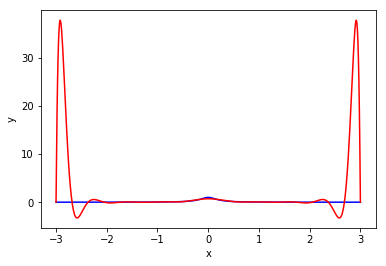

In [100]:
t = np.arange(-3, 3.01, 0.01)
ps = [float(pn.subs(x,tt)) for tt in t]
plt.plot(t,f(t), 'b')
plt.plot(t, ps, 'r')
plt.xlabel('x')
plt.ylabel('y')